# Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset

In [2]:
#Dataset
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
## No missing value, data is already clean

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
## There are a lot of features with dtype as object. We need to convert these features from categorical to discrete

In [13]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
## customerID is irrelevant feature for prediction so drop it
df.drop(columns = ['customerID'], axis = 1, inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
#Missing value treatment
#Outlier detection
#EDA(Barplot, Histogram, Scatterplot, Pie chart, Heatmap)
#Feature Engineering
#Data Preprocessing
#Feature selection
#Modelling

In [24]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [26]:
#The data/distribution is imbalanced, Upsampling or Downsampling needs to be used.

In [81]:
#Features which only have two values

columns = df.columns
binary_cols = []
i = 0
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [82]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\si

<AxesSubplot: xlabel='PaperlessBilling', ylabel='count'>

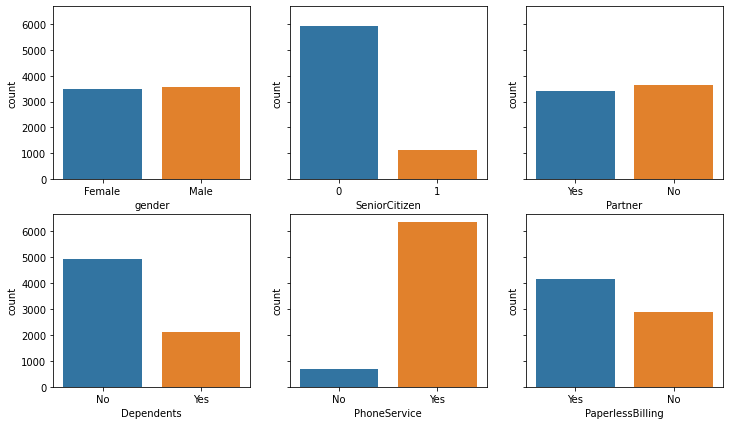

In [83]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [84]:
#Imbalance in PhoneService(mostly people have phone service) and SeniorCitizen(most people are not senior citizen)

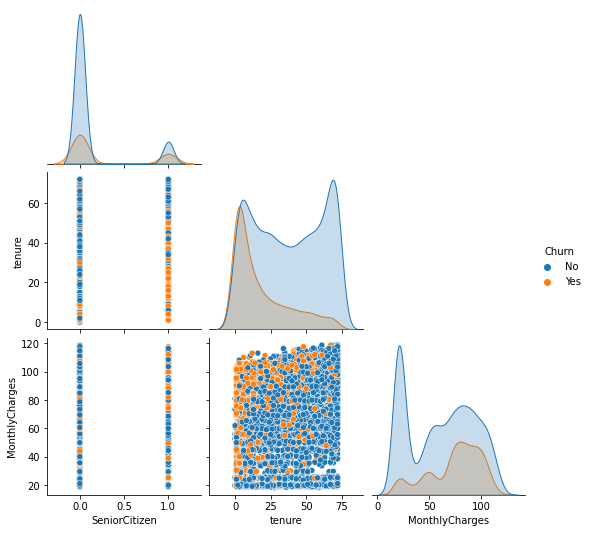

In [87]:
sns.pairplot(df, hue='Churn', corner=True)

In [95]:
#People with short tenure opt for higher monthly charges plan more

In [123]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [99]:
df[['gender', 'Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [101]:
#Churn rate for male and female is approximately same, which indicates gender is not that important feature to determine the output

In [104]:
df[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [105]:
#Churn rate is low in case of Senior Citizen

In [108]:
df.Partner.value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [106]:
df[['Partner', 'Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [109]:
df.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [107]:
df[['Dependents', 'Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [110]:
df[['PhoneService', 'Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [111]:
df[['PaperlessBilling', 'Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [112]:
#From the above information we can see that PhoneService feature doesn't tell us much about the churn

In [113]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


<AxesSubplot: xlabel='tenure'>

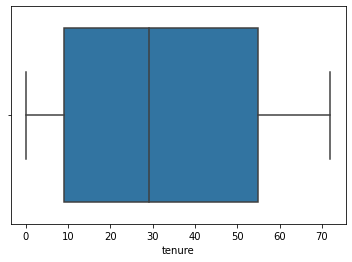

In [114]:
sns.boxplot(x=df.tenure)

<AxesSubplot: xlabel='MonthlyCharges'>

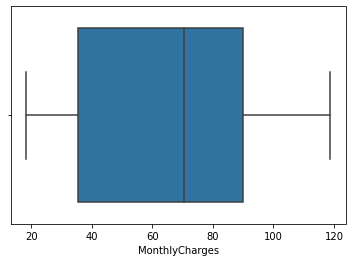

In [115]:
sns.boxplot(x=df.MonthlyCharges)

In [127]:
df['TotalCharges'].replace({'':np.nan, ' ':np.nan}, inplace=True)

In [128]:
df['TotalCharges'].astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [129]:
df['TotalCharges'].isnull().sum()

11

In [141]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)

In [142]:
df['TotalCharges'].dtypes

dtype('float64')

In [145]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

<AxesSubplot: xlabel='TotalCharges', ylabel='Count'>

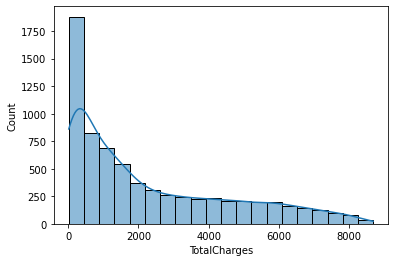

In [149]:
sns.histplot(data=df, x='TotalCharges', bins=20, kde=True)

In [150]:
df['TotalCharges'].median()

1397.475

In [151]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<AxesSubplot: xlabel='TotalCharges'>

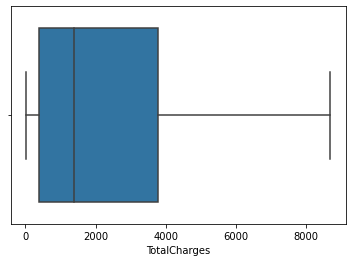

In [152]:
sns.boxplot(x='TotalCharges', data=df)

In [153]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


<AxesSubplot: xlabel='InternetService', ylabel='count'>

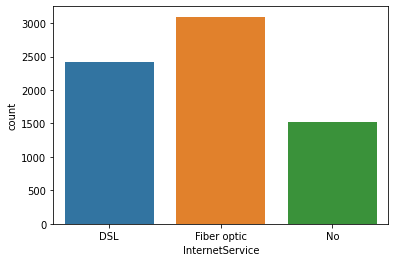

In [156]:
sns.countplot(data=df, x='InternetService')

In [157]:
df[['InternetService', 'Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [158]:
df[['InternetService', 'MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


In [159]:
#Customer with fiber opric Internet Service has higher churn rate and the monthly charges of Fiber optic are also high in comparison

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mohit\anaconda3\lib\si

<AxesSubplot: xlabel='TechSupport', ylabel='count'>

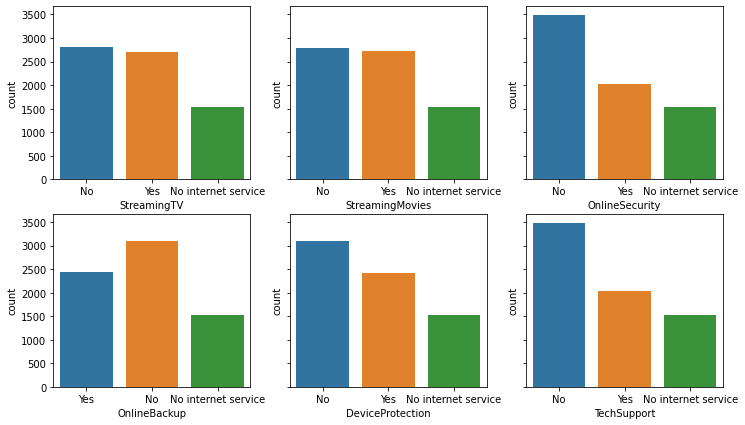

In [160]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [164]:
print(df[['StreamingTV', 'Churn']].groupby('StreamingTV').mean())
print()
print(df[['StreamingMovies', 'Churn']].groupby('StreamingMovies').mean())
print()
print(df[['OnlineSecurity', 'Churn']].groupby('OnlineSecurity').mean())
print()
print(df[['OnlineBackup', 'Churn']].groupby('OnlineBackup').mean())
print()
print(df[['DeviceProtection', 'Churn']].groupby('DeviceProtection').mean())
print()
print(df[['TechSupport', 'Churn']].groupby('TechSupport').mean())

                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702

                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414

                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112

                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315

                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021

                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663


In [166]:
#All internet service related features seems to have different churn rates for their classes. 
#The difference on StreamingTV and StreamingMovies are not much.

In [167]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [168]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [170]:
##PhoneService --> MultipleLines. 
#MultipleLines column includes more specific data compared to PhoneService column, so we can use MultipleLines and drop PhoneService

In [171]:
print(df[['MultipleLines', 'Churn']].groupby('MultipleLines').mean())

                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099


<AxesSubplot: xlabel='Contract', ylabel='count'>

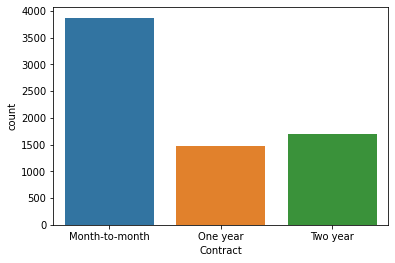

In [172]:
sns.countplot(data=df, x='Contract')

In [173]:
df[['Contract', 'Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [174]:
#customers with short-term contract are more likely to churn

<AxesSubplot: xlabel='PaymentMethod', ylabel='count'>

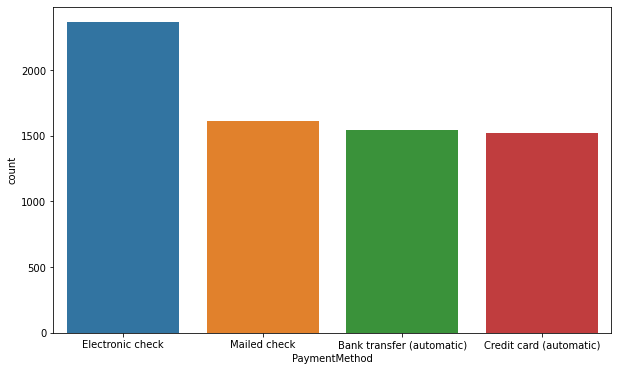

In [176]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod')

In [177]:
df[['PaymentMethod', 'Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


In [178]:
#Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types

In [179]:
#The continuous features are tenure, monthly charges and total charges. 
#The amount in total charges column is proportional to tenure (months) multiplied by monthly charges.

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='MonthlyCharges', ylabel='Density'>

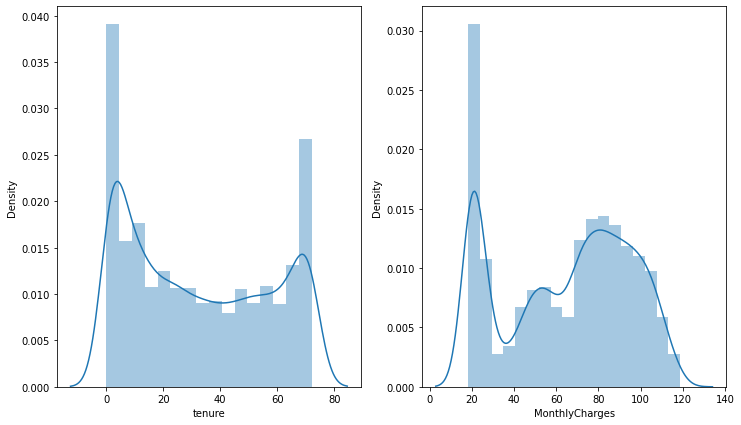

In [180]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [181]:
#According to the distribution of tenure variable, most of the customers are either pretty new or have stayed for a long time with the company
#MonthlyCharges --> There seems to be a gap between low rates and high rates

In [182]:
df[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [183]:
##Those with short tenure(months) or high monthly charges seems to churn.

In [184]:
df[['Contract', 'tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


In [185]:
#Contract and tenure are highly correlated. 
#Customers with long contracts have been a customer for longer time than customers with short-term contracts.
#So, Contract can be dropped.

In [186]:
df.drop(['gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [187]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [188]:
df.shape

(7043, 16)

# Data Preprocessing

In [189]:
#The categorical variables in the dataset are not ordinal (i.e. there is no order in them).

In [190]:
'''When we encode the categorical variables, a number will be assigned to each category. 
The category with higher numbers will be considered more important or effect the model more. 
Therefore, we need to do encode the variables in a way that each category will be represented 
by a column and the value in that column will be 0 or 1.'''

'When we encode the categorical variables, a number will be assigned to each category. \nThe category with higher numbers will be considered more important or effect the model more. \nTherefore, we need to do encode the variables in a way that each category will be represented \nby a column and the value in that column will be 0 or 1.'

In [191]:
'''We also need to scale continuous variables. Otherwise, variables with higher values will 
be given more importance which effects the accuracy of the model.'''

'We also need to scale continuous variables. Otherwise, variables with higher values will \nbe given more importance which effects the accuracy of the model.'

In [192]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  PaperlessBilling  7043 non-null   object 
 13  PaymentMethod     7043 non-null   object 
 14  MonthlyCharges    7043 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(1), int64(3), object(12)
memory

In [195]:
#Encoding categorical variables
cat_features = ['SeniorCitizen', 'Partner', 'Dependents','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

In [196]:
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [197]:
X

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,0,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,72,103.20,0,0,1,1,0,1,1,0,...,0,0,0,1,0,1,1,1,0,0
7040,11,29.60,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,1,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [199]:
#Scaling continuous variables
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

X['tenure'] = a
X['MonthlyCharges'] = b

In [200]:
X.shape

(7043, 26)

In [201]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Resampling

C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution Before Resampling')

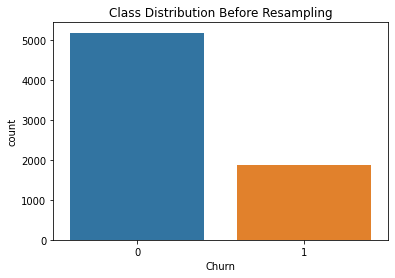

In [202]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [203]:
#Separating positive class (churn=yes) and negative class (churn=no)

X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [204]:
#Upsampling the positive class

X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)

In [206]:
print(len(X_yes_upsampled))
print(len(X_no))

5174
5174


C:\Users\mohit\AppData\Local\Temp\ipykernel_3056\1423631614.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
C:\Users\mohit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution After Resampling')

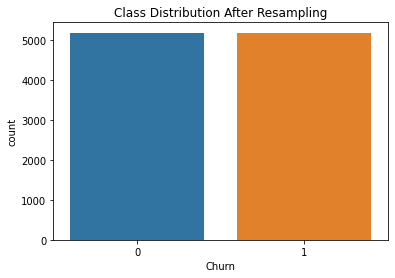

In [207]:
#Combining positive and negative class and checking class distribution

X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

In [208]:
X_upsampled.shape

(10348, 26)

# Model Creation and Evaluation

In [209]:
from sklearn.model_selection import train_test_split

X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
Y = X_upsampled['Churn'] #target (dependent variable)

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [212]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [213]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, Y_train) #train the model

RidgeClassifier()

In [214]:
#Making predictions on training set and evaluating
pred = clf_ridge.predict(X_train)

In [215]:
accuracy_score(Y_train, pred)

0.7574293307562213

In [217]:
#Making predictions on test set and evaluating
pred_test = clf_ridge.predict(X_test)
accuracy_score(Y_test, pred_test)

0.7608695652173914

In [218]:
#Model is not Overfitting however the accuracy of 75% is not good

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, Y_train)

pred_train_lr = clf_lr.predict(X_train)
print('Accuracy(Train Data) :', accuracy_score(Y_train, pred_train_lr))
pred_test_lr = clf_lr.predict(X_test)
print('Accuracy(Test Data) :', accuracy_score(Y_test, pred_test_lr))

Accuracy(Train Data) : 0.7553756946122252
Accuracy(Test Data) : 0.7603864734299517


In [221]:
#Model is performing similar to Ridge classifier

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
clf_forest = RandomForestClassifier()
clf_forest.fit(X_train, Y_train)

pred_train_rf = clf_forest.predict(X_train)
print('Accuracy(Train Data) :', accuracy_score(Y_train, pred_train_rf))
pred_test_rf = clf_forest.predict(X_test)
print('Accuracy(Test Data) :', accuracy_score(Y_test, pred_test_rf))

Accuracy(Train Data) : 0.996859144720947
Accuracy(Test Data) : 0.9077294685990338


In [225]:
#Model is performing good but overfitting is taking place

In [226]:
'''Out of the three models we can see that Random Forest has perform the best, but overfitting is taking place.
So, to eliminate the overfitting lets tune our Random Forest model.'''

'Out of the three models we can see that Random Forest has perform the best, but overfitting is taking place.\nSo, to eliminate the overfitting lets tune our Random Forest model.'

### Model Tuning

In [230]:
#Our model can be overfitted beacause of the depth of the tree. 
#We can control the depth of the tree and increase the no. of decision trees to make our model Generalized.

In [228]:
from sklearn.model_selection import GridSearchCV        #GridSearchCV is used for Parameter Tuning using cross-validation

In [240]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}        #n_estimators is no. of trees and max_depth max. depth of the trees in ou model
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)      
'''cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in 
training and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training 
and test samples.
And n_jobs tells about how many processors to use, -1 means all processors.'''

'cv = 5 means having a 5-fold cross validation. So dataset is divided into 5 subset. At each iteration, 4 subsets are used in \ntraining and the other subset is used as test set. When 5 iteration completed, the model used all samples as both training \nand test samples.\nAnd n_jobs tells about how many processors to use, -1 means all processors.'

In [241]:
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25],
                         'n_estimators': [150, 200, 250, 300]})

In [242]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 25, 'n_estimators': 300}
0.8991111484695867


In [247]:
#The overall accuracy achieved is almost 90%. This is the mean cross-validated score of the best_estimator.

In [248]:
Y_pred = clf.predict(X_test)

In [249]:
from sklearn.metrics import confusion_matrix, classification_report

In [250]:
confusion_matrix(Y_pred, Y_test)

array([[1039,    0],
       [   5, 1026]], dtype=int64)

In [254]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1039
           1       1.00      1.00      1.00      1031

    accuracy                           1.00      2070
   macro avg       1.00      1.00      1.00      2070
weighted avg       1.00      1.00      1.00      2070

